In [53]:
import pandas as pd
from tabulate import tabulate

%reload_ext rpy2.ipython

In [15]:
%%R

library(readr)
companyDF <- read_csv("https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv", show_col_types = FALSE)
head(companyDF,10)

# A tibble: 10 × 4
      TV Radio Newspaper Sales
   <dbl> <dbl>     <dbl> <dbl>
 1 230.   37.8      69.2  22.1
 2  44.5  39.3      45.1  10.4
 3  17.2  45.9      69.3  12  
 4 152.   41.3      58.5  16.5
 5 181.   10.8      58.4  17.9
 6   8.7  48.9      75     7.2
 7  57.5  32.8      23.5  11.8
 8 120.   19.6      11.6  13.2
 9   8.6   2.1       1     4.8
10 200.    2.6      21.2  15.6


In [16]:
%%R

summary(companyDF)

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  


In [205]:
%%R

cor_data = cor(companyDF)
 
print("Correlation matrix")
print(cor_data)

[1] "Correlation matrix"
                  TV      Radio  Newspaper     Sales
TV        1.00000000 0.05480866 0.05664787 0.9012079
Radio     0.05480866 1.00000000 0.35410375 0.3496311
Newspaper 0.05664787 0.35410375 1.00000000 0.1579600
Sales     0.90120791 0.34963110 0.15796003 1.0000000


Computing the coorelation matrix.

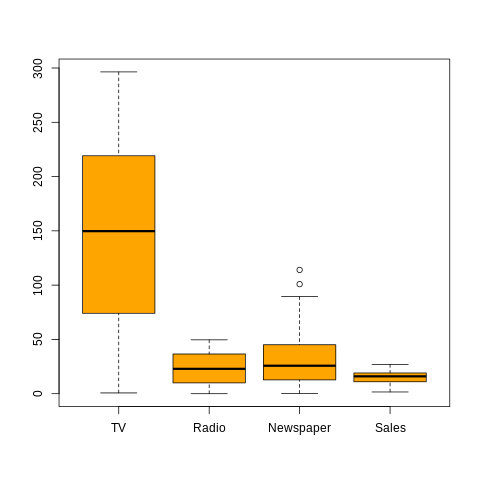

In [179]:
%%R

par(mfrow=c(1,1))

boxplot(companyDF,
           col="orange")
  

Barplot of companyDF.

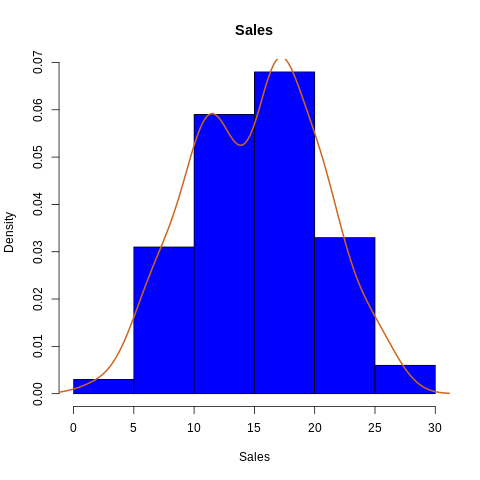

In [178]:
%%R

hist(companyDF$Sales, 
     col="blue",
     border="black",
     prob = TRUE,
     xlab = "Sales",
     main="Sales")
  
lines(density(companyDF$Sales),
      lwd = 2,
      col = "chocolate3")

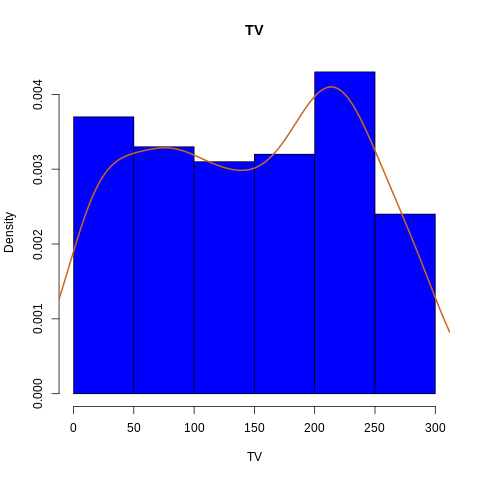

In [177]:
%%R

hist(companyDF$TV, 
     col="blue",
     border="black",
     prob = TRUE,
     xlab = "TV",
     main = "TV")
  
lines(density(companyDF$TV),
      lwd = 2,
      col = "chocolate3")

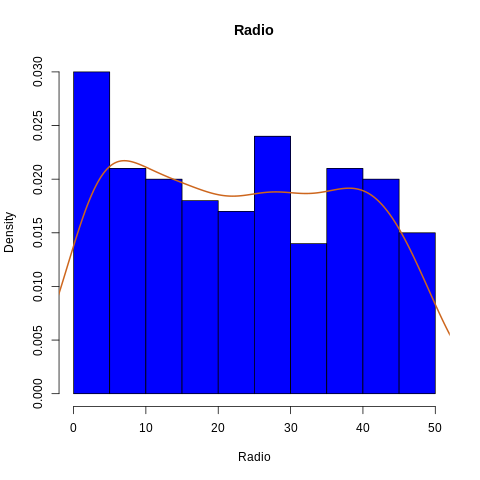

In [176]:
%%R

hist(companyDF$Radio, 
     col="blue",
     border="black",
     prob = TRUE,
     xlab = "Radio",
     main = "Radio")
  
lines(density(companyDF$Radio),
      lwd = 2,
      col = "chocolate3")

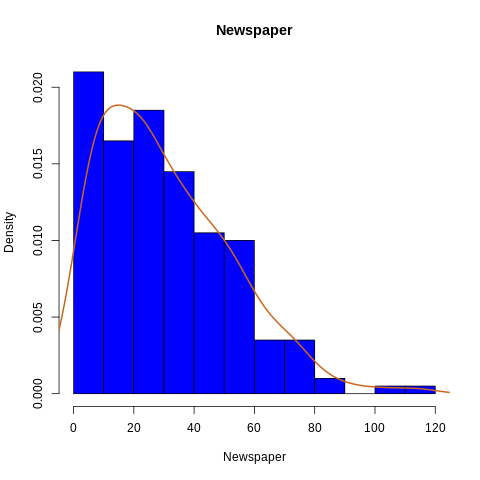

In [175]:
%%R

hist(companyDF$Newspaper, 
     col="blue",
     border="black",
     prob = TRUE,
     xlab = "Newspaper",
     main = "Newspaper")
  
lines(density(companyDF$Newspaper),
      lwd = 2,
      col = "chocolate3")

Histograms with Destiny lines. 

Work Cited : https://www.geeksforgeeks.org/histograms-and-density-plots-in-r/


In [64]:
%%R


cat("No. missing values = ", sum(is.na(companyDF)), "\n\n")

No. missing values =  0 



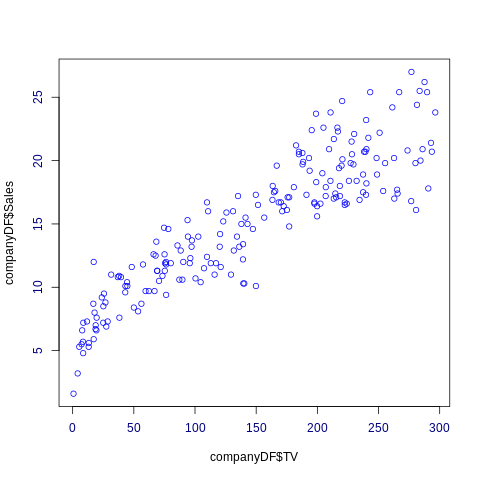

In [81]:
%%R

plot(y = companyDF$Sales, x = companyDF$TV,
   col = "blue",
   col.axis = "navy")

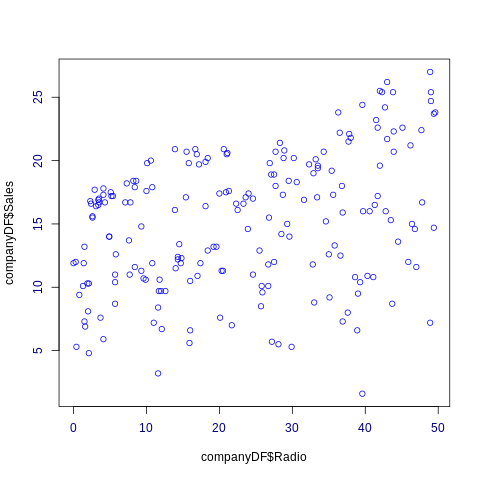

In [84]:
%%R

plot(y = companyDF$Sales, x = companyDF$Radio,
   col = "blue",
   col.axis = "navy")

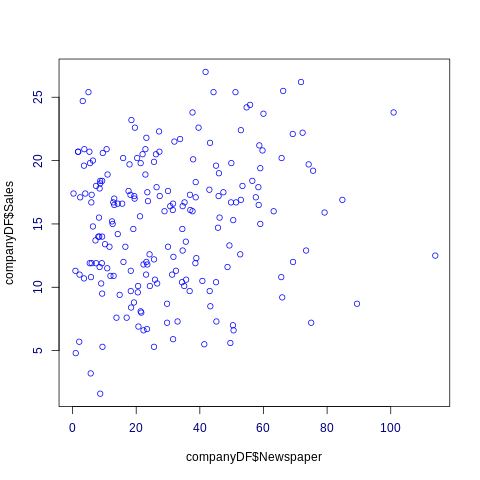

In [83]:
%%R

plot(y = companyDF$Sales, x = companyDF$Newspaper,
   col = "blue",
   col.axis = "navy")

Scatter plots for each of the columns compared to Sales.

In [139]:
%%R

lm = lm(Sales~TV, data = companyDF) 
summary(lm)


Call:
lm(formula = Sales ~ TV, data = companyDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4438 -1.4857  0.0218  1.5042  5.6932 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.974821   0.322553   21.62   <2e-16 ***
TV          0.055465   0.001896   29.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.296 on 198 degrees of freedom
Multiple R-squared:  0.8122,	Adjusted R-squared:  0.8112 
F-statistic: 856.2 on 1 and 198 DF,  p-value: < 2.2e-16



Creating the Linear Regression Model.

In [184]:
%%R

split1<- sample(c(rep(0, 0.7 * nrow(companyDF)), rep(1, 0.3 * nrow(companyDF))))
train <- companyDF[split1 == 0, ]   
test <- companyDF[split1== 1, ]    

table(split1)

split1
  0   1 
140  60 


Splitting the testing and Training data 30/70 respectivly. 

In [185]:
%%R

lm1 = lm(Sales~TV, data = test) 
summary(lm1)


Call:
lm(formula = Sales ~ TV, data = test)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4797 -1.3212  0.2885  1.1945  5.5392 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.978670   0.529249   13.19   <2e-16 ***
TV          0.055298   0.003062   18.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.087 on 58 degrees of freedom
Multiple R-squared:  0.849,	Adjusted R-squared:  0.8464 
F-statistic: 326.1 on 1 and 58 DF,  p-value: < 2.2e-16



Intercept and slope for the test set.

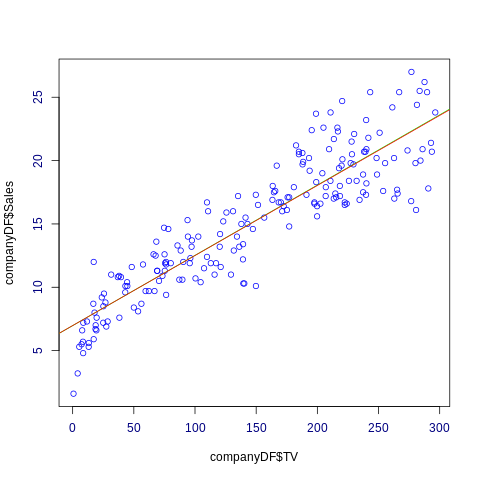

In [201]:
%%R
plot(y = companyDF$Sales, x = companyDF$TV,
   col = "blue",
   col.axis = "navy")
abline(6.974821,0.055465,col="green")
abline(6.978670,0.055298,col="red")

Scatter plot of TV vs Sales with slope of the data set (green) compared to the test set (red).

In [192]:
%%R

lm2 = lm(Sales~Newspaper+Radio+TV, data = companyDF) #Create the linear regression
summary(lm2)


Call:
lm(formula = Sales ~ Newspaper + Radio + TV, data = companyDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3034 -0.8244 -0.0008  0.8976  3.7473 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.6251241  0.3075012  15.041   <2e-16 ***
Newspaper   0.0003357  0.0057881   0.058    0.954    
Radio       0.1070012  0.0084896  12.604   <2e-16 ***
TV          0.0544458  0.0013752  39.592   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.662 on 196 degrees of freedom
Multiple R-squared:  0.9026,	Adjusted R-squared:  0.9011 
F-statistic: 605.4 on 3 and 196 DF,  p-value: < 2.2e-16



In [196]:
%%R

split2<- sample(c(rep(0, 0.7 * nrow(companyDF)), rep(1, 0.3 * nrow(companyDF))))
train2 <- companyDF[split2 == 0, ]   
test2 <- companyDF[split2== 1, ]    

table(split2)

split2
  0   1 
140  60 


In [199]:
%%R

lm3 = lm(Sales~Newspaper+Radio+TV, data = test2) 
summary(lm3)


Call:
lm(formula = Sales ~ Newspaper + Radio + TV, data = test2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5010 -0.7522 -0.2311  0.6797  3.5462 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.889014   0.437345  11.179 6.91e-16 ***
Newspaper   0.013461   0.009989   1.348    0.183    
Radio       0.126402   0.014785   8.549 9.73e-12 ***
TV          0.046988   0.002111  22.261  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.344 on 56 degrees of freedom
Multiple R-squared:  0.9352,	Adjusted R-squared:  0.9317 
F-statistic: 269.2 on 3 and 56 DF,  p-value: < 2.2e-16



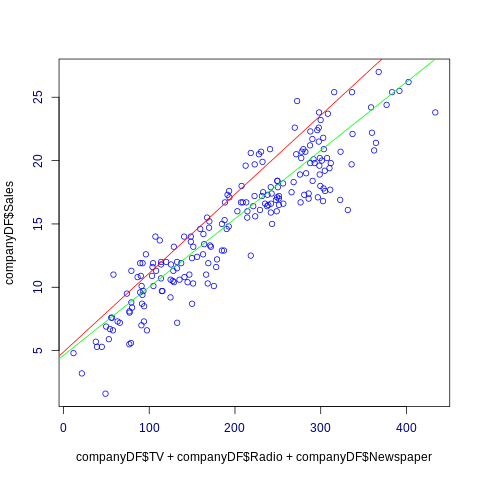

In [204]:
%%R
plot(y = companyDF$Sales, x = companyDF$TV+companyDF$Radio+companyDF$Newspaper,
   col = "blue",
   col.axis = "navy")
abline(4.6251241,0.0539275,col="green")
abline(4.889014,0.0622836,col="red")

Scatter plot of All vs Sales with slope of the data set (green) compared to the test set (red). I took the average of the intercepts to get the intercept for each equation.

Summarize:

Looking at the linear models between Sales vs TV and Sales vs All, using the 70/30 training testing ratio yielded fairly accurate results. Sales vs TV's equation was almost exactly the same as the original equation. Sales vs All was similar in slope but even the .2 that they were off made the slopes drastically apart as they got further away from the intercepts. 